# 0.0 IMPORTS

In [1]:
import inflection
import tabulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 0.1 HELPER FUNCTIONS

## 0.2 FUNCTIONS

In [2]:
def variacao_percentual(preco, data):
    lista = [0]
    for i in range(len(data)):
        if i == 0:
            continue
        lista.append((data[preco][i] * 100 / data[preco][i-1]) - 100)
    return lista

In [3]:
def plot_variacao_perc(x, y, data, title='Variacao Percentual', xlabel='', ylabel=''):
    fig, ax = plt.subplots(figsize=(12,8))

    ax = sns.lineplot(
        y=y, 
        x=x, 
        data=data, 
        marker='*'
    )

    # set values in markers
    for x, y in zip(data[x], data[y]):
        plt.text(
            x = x, 
            y = y, 
            s = '{:.2f}'.format(y), 
            color = 'black').set_backgroundcolor('#dfedee')

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel);

## 0.3 LOAD DATASET

In [4]:
df_raw = pd.read_csv('../data/raw/2004-2021.tsv', sep='\t')

# 1.0 DATA DESCRIPTIONS

In [5]:
df1 = df_raw.copy()

## 1.1 RENAME COLUMNS

In [6]:
cols_old = df1.columns.values
snakecase = lambda x: inflection.parameterize(x, separator='_')
cols_new = list( map( snakecase, cols_old ) )

# rename columns
df1.columns = cols_new

## 1.2 DATA DIMENSIONS

In [7]:
print(f'This dataset has {df1.shape[0]} rows and {df1.shape[1]} columns')

This dataset has 120823 rows and 18 columns


## 1.3 DATA TYPES (RAW)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   data_inicial                   120823 non-null  object 
 1   data_final                     120823 non-null  object 
 2   regiao                         120823 non-null  object 
 3   estado                         120823 non-null  object 
 4   produto                        120823 non-null  object 
 5   numero_de_postos_pesquisados   120823 non-null  int64  
 6   unidade_de_medida              120823 non-null  object 
 7   preco_medio_revenda            120823 non-null  float64
 8   desvio_padrao_revenda          120823 non-null  float64
 9   preco_minimo_revenda           120823 non-null  float64
 10  preco_maximo_revenda           120823 non-null  float64
 11  margem_media_revenda           120823 non-null  object 
 12  coef_de_variacao_revenda      

## 1.4 CHANGE DATA TYPES

In [9]:
df1['data_inicial'] = pd.to_datetime(df1['data_inicial'])
df1['data_final'] = pd.to_datetime(df1['data_final'])
df1['margem_media_revenda'] = df1['margem_media_revenda'].apply(lambda x: np.nan if x == '-' else float(x))
df1['preco_medio_distribuicao'] = df1['preco_medio_distribuicao'].apply(lambda x: np.nan if x == '-' else float(x))
df1['desvio_padrao_distribuicao'] = df1['desvio_padrao_distribuicao'].apply(lambda x: np.nan if x == '-' else float(x))
df1['preco_minimo_distribuicao'] = df1['preco_minimo_distribuicao'].apply(lambda x: np.nan if x == '-' else float(x))
df1['preco_maximo_distribuicao'] = df1['preco_maximo_distribuicao'].apply(lambda x: np.nan if x == '-' else float(x))
df1['coef_de_variacao_distribuicao'] = df1['coef_de_variacao_distribuicao'].apply(lambda x: np.nan if x == '-' else float(x))

## 1.5 DATA TYPES (CHANGED)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   data_inicial                   120823 non-null  datetime64[ns]
 1   data_final                     120823 non-null  datetime64[ns]
 2   regiao                         120823 non-null  object        
 3   estado                         120823 non-null  object        
 4   produto                        120823 non-null  object        
 5   numero_de_postos_pesquisados   120823 non-null  int64         
 6   unidade_de_medida              120823 non-null  object        
 7   preco_medio_revenda            120823 non-null  float64       
 8   desvio_padrao_revenda          120823 non-null  float64       
 9   preco_minimo_revenda           120823 non-null  float64       
 10  preco_maximo_revenda           120823 non-null  float64       
 11  

# 2.0 DESCRIPTIVE STATISTICAL

In [11]:
df2 = df1.copy()

## 2.1 NUMERICAL

In [12]:
num_attributes = df2.select_dtypes(include=['int64', 'float64'])
df_num_attributes = num_attributes.agg(["mean","median","std","min","max","skew","kurtosis"]).T.reset_index().rename(columns={'index':'attributes'})
df_num_attributes

,attributes,mean,median,std,min,max,skew,kurtosis
0,numero_de_postos_pesquisados,221.066461,99.0000,387.940239,1.000,4167.000,4.555252,27.570105
1,preco_medio_revenda,11.473440,2.8990,19.161823,0.766,107.500,2.106955,3.511045
2,desvio_padrao_revenda,0.684132,0.1210,1.403317,0.000,10.748,2.844465,8.458709
3,preco_minimo_revenda,9.977821,2.6900,16.433783,0.590,100.000,2.170683,3.992776
4,preco_maximo_revenda,13.233902,3.2000,22.451445,0.999,120.000,2.138187,3.641970
5,margem_media_revenda,-4697.376395,0.3810,21163.482182,-99999.000,36.847,-4.281123,16.328290
6,coef_de_variacao_revenda,0.045298,0.0410,0.024763,0.000,0.395,1.004840,2.503318
7,preco_medio_distribuicao,-4682.188208,2.3590,21145.807211,-99999.000,83.137,-4.285824,16.368575
8,desvio_padrao_distribuicao,-4690.133173,0.0760,21144.040032,-99999.000,18.385,-4.285827,16.368591
9,preco_minimo_distribuicao,-4683.305792,2.2380,21145.558085,-99999.000,83.000,-4.285825,16.368579


## 2.2 CATEGORICAL

In [13]:
cat_attributes = df2.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]'])
cat_attributes.apply( lambda x: x.unique().shape[0] )

regiao                5
estado               27
produto               9
unidade_de_medida     3
dtype: int64

In [14]:
df2['produto'].value_counts(normalize=True)

produto
GASOLINA COMUM        0.195079
GLP                   0.195004
ETANOL HIDRATADO      0.194003
ÓLEO DIESEL           0.175414
GNV                   0.119754
ÓLEO DIESEL S10       0.075424
OLEO DIESEL S10       0.019665
OLEO DIESEL           0.019458
GASOLINA ADITIVADA    0.006199
Name: proportion, dtype: float64

In [15]:
df2['unidade_de_medida'].value_counts(normalize=True)

unidade_de_medida
R$/l       0.685242
R$/13Kg    0.195004
R$/m3      0.119754
Name: proportion, dtype: float64

# 3.0 PREPARATION EDA

In [16]:
df3 = df2.copy()

## 3.1 HYPOTHESES

- Variação percentual ao longo dos anos no estado de São Paulo
- Variação percentual ao longo de 2020, ano da pandemia
- Margem média dos postos em dezembro de 2010
- Preço médio dos estados por região em 2012
- Diferença absoluta e percentual por produto, além de qual estado obteve os maiores e menores preços registrados.
- Como diferentes regiões do Brasil viram seus preços de gás mudarem?

## 3.2 FEATURE ENGINEERING

In [17]:
df3['ano'] = df3['data_final'].apply(lambda x: x.year)
df3['mes'] = df3['data_final'].apply(lambda x: x.month)
df3['ano_mes'] = df3['data_final'].apply(lambda x: x.strftime('%Y-%m'))
df3['produto'] = df3['produto'].apply(lambda x: x.replace('ÓLEO', 'OLEO'))

## 3.3 DATA FILTERING

In [18]:
df3 = df3[(~df3['margem_media_revenda'].isnull()) &
          (df3['margem_media_revenda'] != -99999)].reset_index(drop=True)

In [19]:
perc_df_total = (df3.shape[0] * 100) / df2.shape[0]
print(f'Está sendo considerado {round(perc_df_total, 2)}% do conjunto original, devido as remoções de linhas com valores nulos')

Está sendo considerado 92.59% do conjunto original, devido as remoções de linhas com valores nulos


# 4.0 EXPLORATORY DATA ANALYSIS (EDA)

In [20]:
df4 = df3.copy()

## 4.1 Variação percentual ao longo dos anos no estado de São Paulo

In [21]:
# create dataframe by product
d = {}
for i in df4['produto'].unique():
    aux=inflection.parameterize(i, separator='_')
    d[f'hip1_{aux}']= (
        df4
        .loc[lambda x: ((x['estado']) == 'SAO PAULO') & (x['produto']==i)]
        .groupby(['produto', 'ano'])['preco_medio_revenda']
        .mean()
        .reset_index()
    )
    
    # include column variacao_percentual
    d[f'hip1_{aux}']['variacao_percentual'] = variacao_percentual('preco_medio_revenda', d[f'hip1_{aux}'])

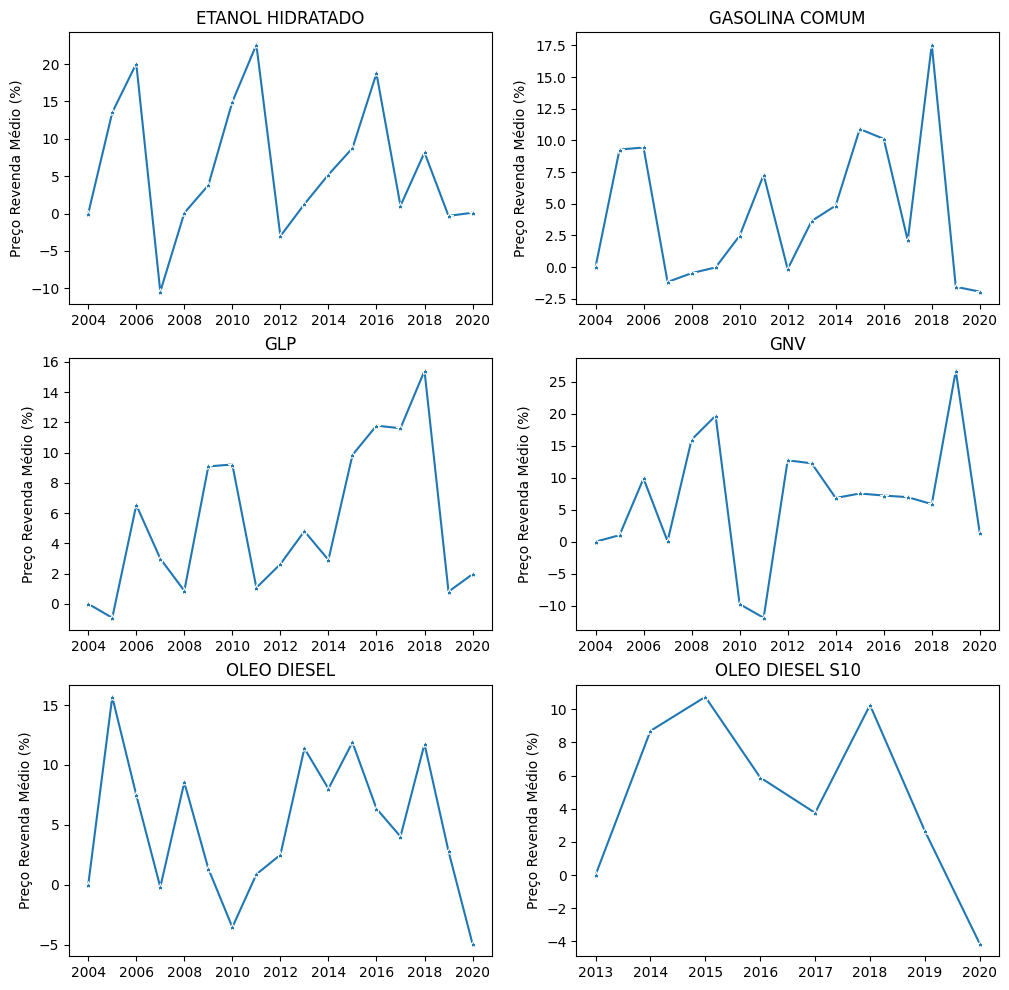

In [22]:
fig, ax = plt.subplots(3,2,figsize=(12,12))
    
for i, key in enumerate(d):

    row = i // 2
    col = i % 2
    
    sns.set_style('darkgrid')
    sns.lineplot(
        x='ano', 
        y='variacao_percentual', 
        data=d[key], 
        marker='*',
        ax=ax[row,col]
    )

    ax[row,col].set_title(d[key]['produto'].unique()[0])
    ax[row,col].set_xlabel('')
    ax[row,col].set_ylabel('Preço Revenda Médio (%)');

## 4.2 Variação percentual ao longo de 2020, ano da pandemia

In [23]:
# create dataframe by product
d_hip2 = {}
for i in df4['produto'].unique():
    aux=inflection.parameterize(i, separator='_')
    d_hip2[f'hip1_{aux}']= (
        df4
        .loc[lambda x: ((x['ano']) == 2020) & (x['produto']==i)]
        .groupby(['estado', 'produto', 'mes'])['preco_medio_revenda']
        .mean()
        .reset_index()
    )

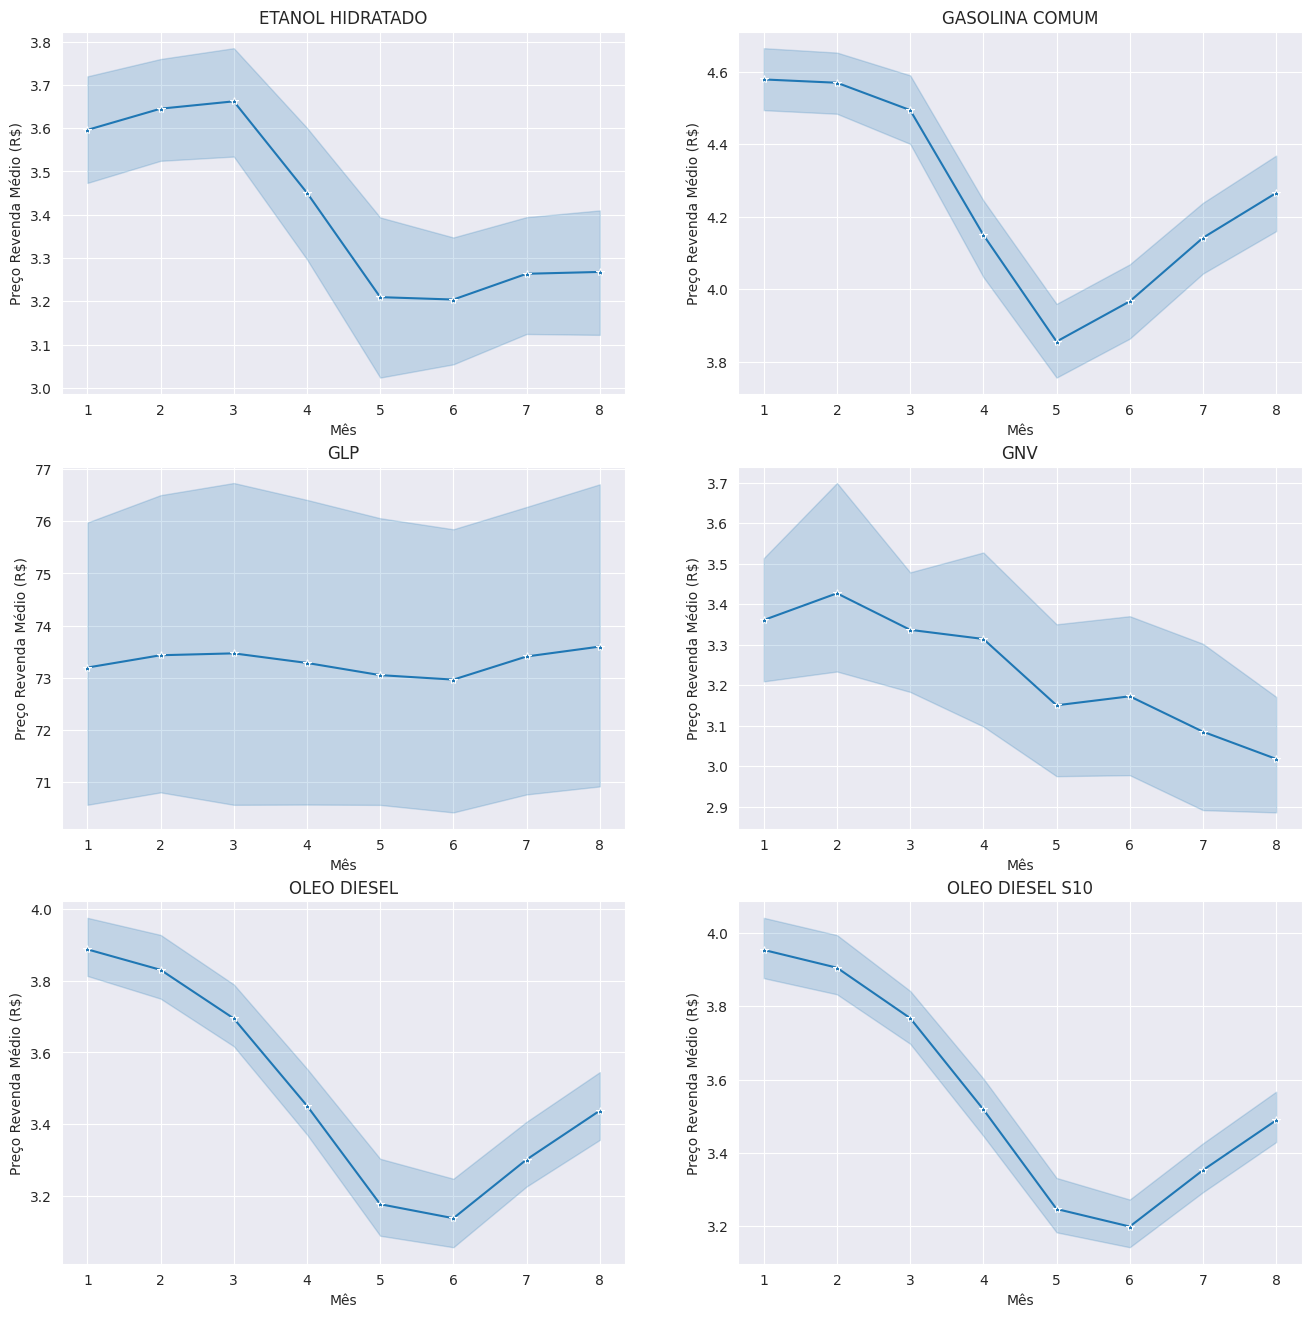

In [24]:
fig, ax = plt.subplots(3,2,figsize=(16,16))
    
for i, key in enumerate(d_hip2):

    row = i // 2
    col = i % 2
    
    sns.set_style('darkgrid')
    sns.lineplot(
        x='mes', 
        y='preco_medio_revenda', 
        data=d_hip2[key], 
        marker='*',
        ax=ax[row,col]
    )

    ax[row,col].set_title(d_hip2[key]['produto'].unique()[0])
    ax[row,col].set_xlabel('Mês')
    ax[row,col].set_ylabel('Preço Revenda Médio (R$)');

## 4.3 Margem média dos postos em dezembro de 2010

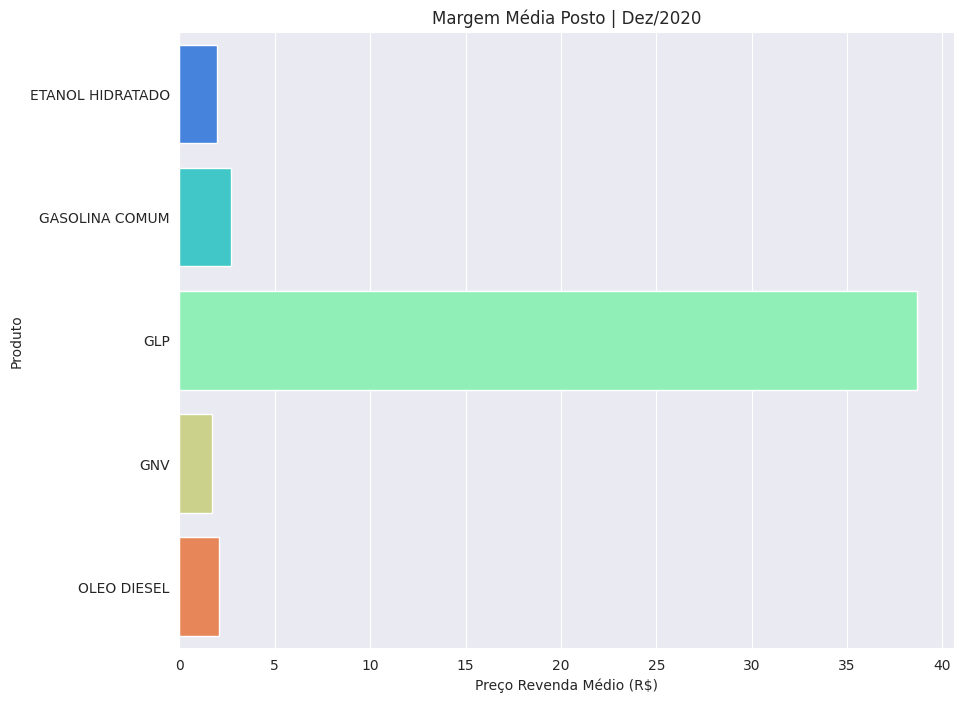

In [25]:
condicao1 = df4[df4['ano_mes'] == '2010-12']
df_hip3 = condicao1.groupby(['ano_mes', 'produto'])['preco_medio_revenda'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10,8))
    
sns.set_style('darkgrid')
sns.barplot(
    y='produto', 
    x='preco_medio_revenda', 
    data=df_hip3,
    orient='h',
    palette='rainbow',
    ax=ax
)

ax.set_title('Margem Média Posto | Dez/2020')
ax.set_xlabel('Preço Revenda Médio (R$)')
ax.set_ylabel('Produto');

## 4.4 Preço médio dos produtos por região em 2012

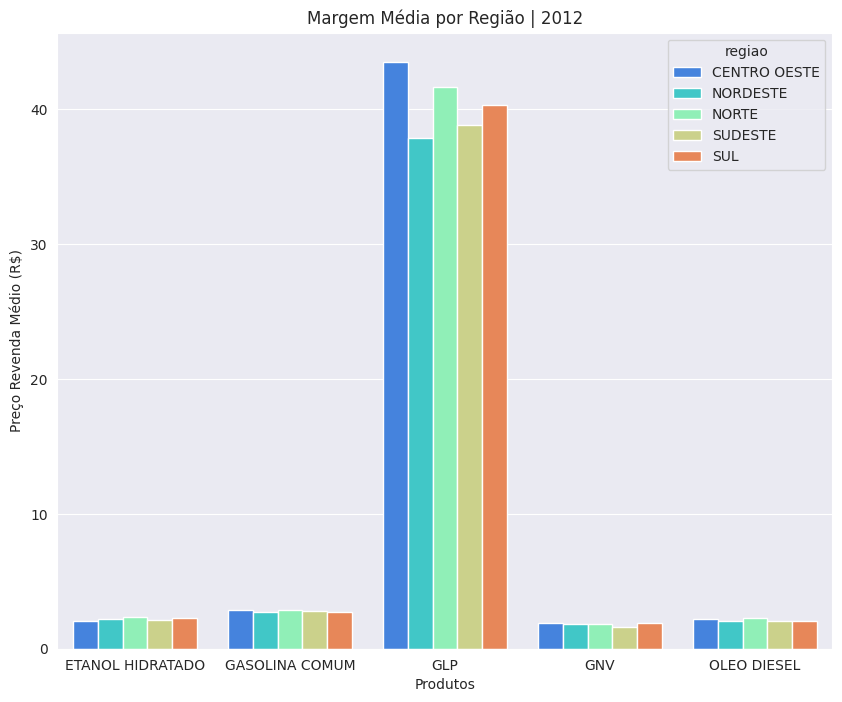

In [26]:
condicao2 = df4[df4['ano'] == 2012]
df_hip4 = condicao2.groupby(['regiao', 'produto'])['preco_medio_revenda'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10,8))
    
sns.set_style('darkgrid')
sns.barplot(
    x='produto', 
    y='preco_medio_revenda', 
    data=df_hip4,
    hue='regiao',
    palette='rainbow',
    ax=ax
)

ax.set_title('Margem Média por Região | 2012')
ax.set_ylabel('Preço Revenda Médio (R$)')
ax.set_xlabel('Produtos');

## 4.5 Diferença absoluta e percentual por produto, além de qual estado obteve os maiores e menores preços registrados.

In [27]:
# create dataframe by product - MAX
d_hip5_max = {}
for i in df4['produto'].unique():
    aux=inflection.parameterize(i, separator='_')
    d_hip5_max[f'hip1_{aux}']= (
        df4
        .loc[lambda x: x['produto']==i]
        .groupby('ano')['preco_medio_revenda']
        .max()
        .reset_index()
    )
    
# create dataframe by product - MIN
d_hip5_min = {}
for i in df4['produto'].unique():
    aux=inflection.parameterize(i, separator='_')
    d_hip5_min[f'hip1_{aux}']= (
        df4
        .loc[lambda x: x['produto']==i]
        .groupby('ano')['preco_medio_revenda']
        .min()
        .reset_index()
    )
    
# create dataframe by product - IDXMAX
d_hip5_idxmax = {}
for i in df4['produto'].unique():
    aux=inflection.parameterize(i, separator='_')
    d_hip5_idxmax[f'hip1_{aux}']= (
        df4
        .loc[lambda x: x['produto']==i]
        .groupby('ano')['preco_medio_revenda']
        .idxmax()
    )
    
# create dataframe by product - IDXMIN
d_hip5_idxmin = {}
for i in df4['produto'].unique():
    aux=inflection.parameterize(i, separator='_')
    d_hip5_idxmin[f'hip1_{aux}']= (
        df4
        .loc[lambda x: x['produto']==i]
        .groupby('ano')['preco_medio_revenda']
        .idxmin()
    )
    
# create final dataframe by product
df_result = {}
for x, i in enumerate(df4['produto'].unique()):
    aux=inflection.parameterize(i, separator='_')

    df_result[f'diff_{aux}'] = pd.DataFrame(
        data={
            'ano': d_hip5_max[f'hip1_{aux}']['ano'],
            'max': d_hip5_max[f'hip1_{aux}']['preco_medio_revenda'],
            'min': d_hip5_min[f'hip1_{aux}']['preco_medio_revenda'],
            'abs_diff': d_hip5_max[f'hip1_{aux}']['preco_medio_revenda'] - d_hip5_min[f'hip1_{aux}']['preco_medio_revenda'],
            'per_diff': (d_hip5_max[f'hip1_{aux}']['preco_medio_revenda'] - d_hip5_min[f'hip1_{aux}']['preco_medio_revenda']) / d_hip5_min[f'hip1_{aux}']['preco_medio_revenda'] * 100,
            'estado_max': df4.loc[d_hip5_idxmax[f'hip1_{aux}'], :]['estado'].values,
            'estado_min': df4.loc[d_hip5_idxmin[f'hip1_{aux}'], :]['estado'].values
        }
    )

In [28]:
mykeys = [*df_result.keys()]
for idkey, value in enumerate(df_result.values()):
    product = inflection.titleize(mykeys[idkey].replace('diff_',''))
    print(f'{product}')
    display(i)
    print('\n')

Etanol Hidratado


'OLEO DIESEL S10'



Gasolina Comum


'OLEO DIESEL S10'



Glp


'OLEO DIESEL S10'



Gnv


'OLEO DIESEL S10'



Oleo Diesel


'OLEO DIESEL S10'



Oleo Diesel S10


'OLEO DIESEL S10'

### Percentual de Diferença por Produto - Anualmente

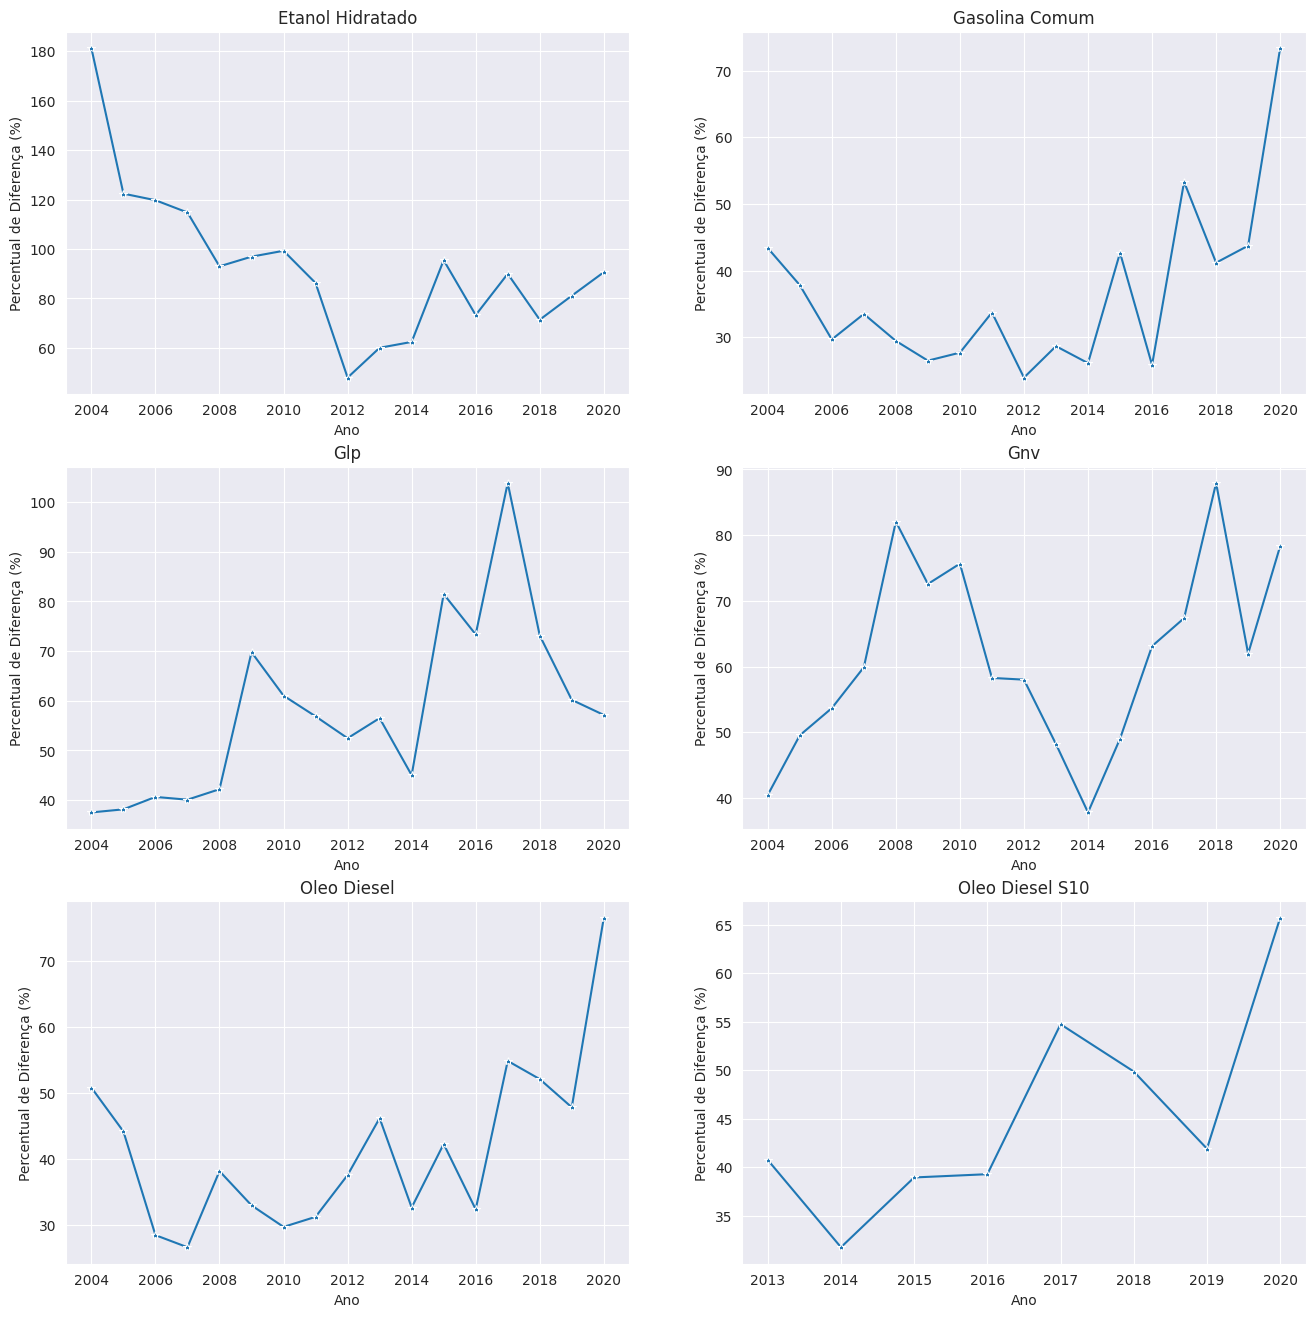

In [29]:
fig, ax = plt.subplots(3,2,figsize=(16,16))
    
for i, key in enumerate(df_result):

    row = i // 2
    col = i % 2
    
    sns.set_style('darkgrid')
    sns.lineplot(
        x='ano',
        y='per_diff',
        data=df_result[key],
        marker='*',
        ax=ax[row,col]
    )
    
    product = inflection.titleize(mykeys[i].replace('diff_',''))

    ax[row,col].set_title(product)
    ax[row,col].set_xlabel('Ano')
    ax[row,col].set_ylabel('Percentual de Diferença (%)');

### Estados com maiores valores por Produto - Anualmente

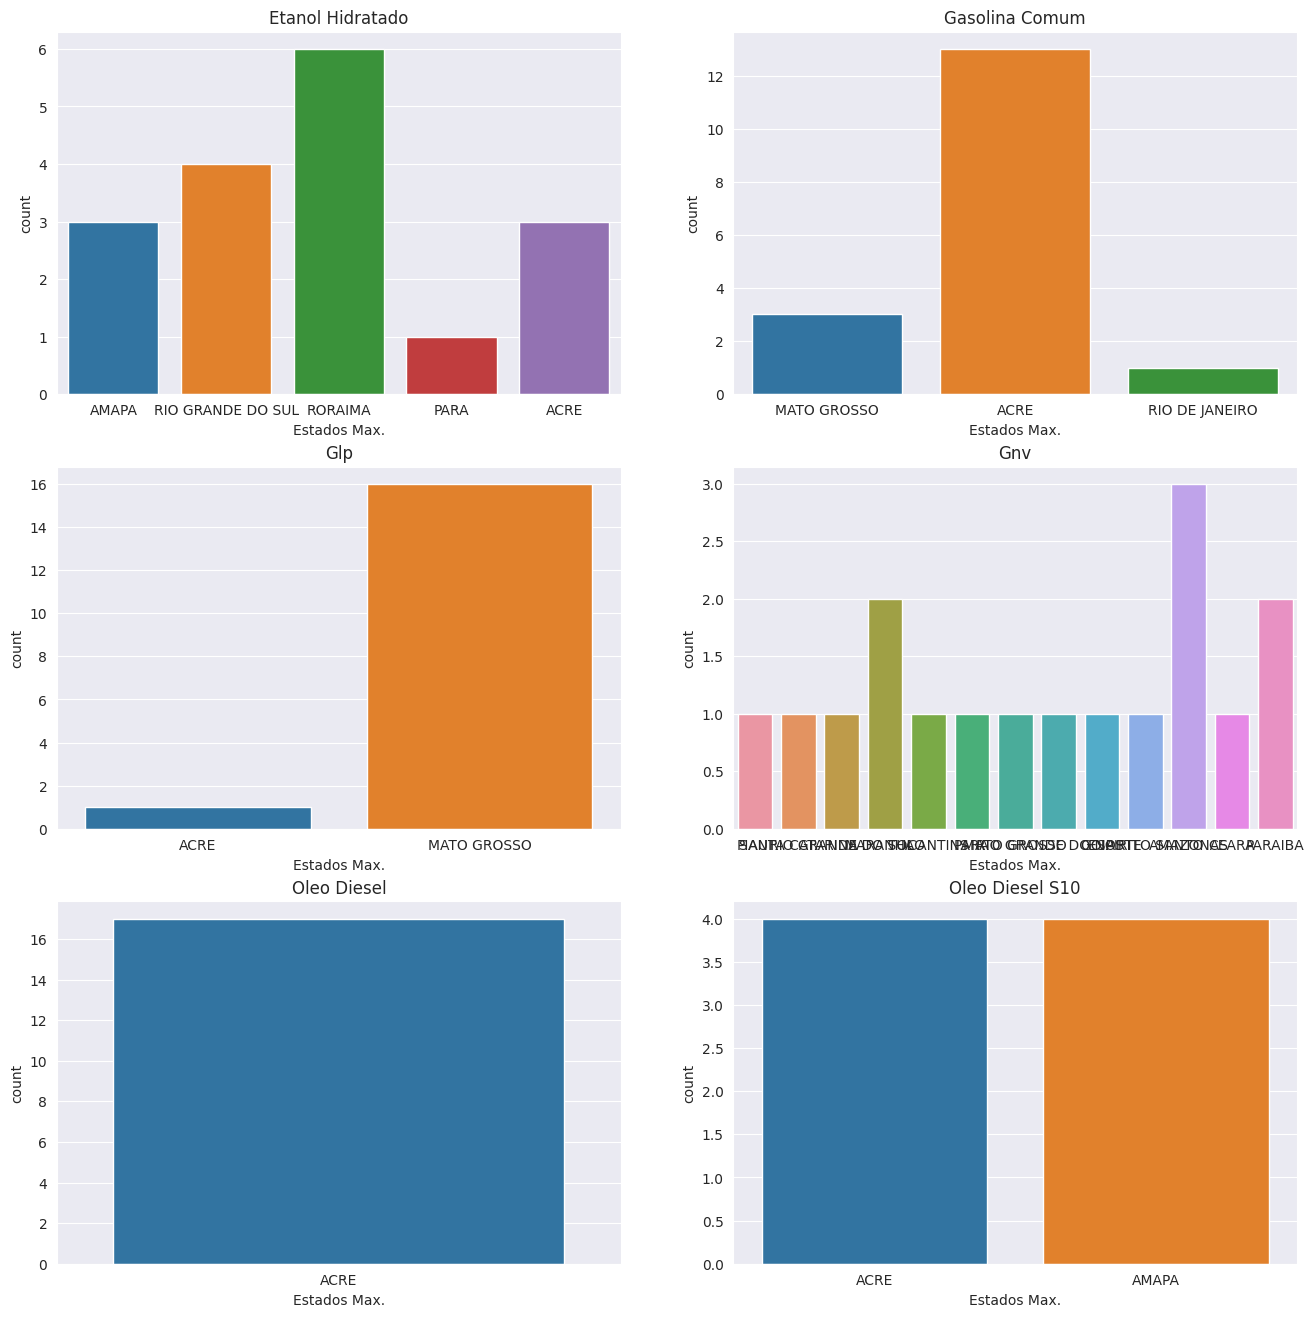

In [30]:
mykeys = [*df_result.keys()]
fig, ax = plt.subplots(3,2,figsize=(16,16))
    
for i, key in enumerate(df_result):

    row = i // 2
    col = i % 2
    
    sns.set_style('darkgrid')
    sns.countplot(
        x='estado_max',
        data=df_result[key],
        ax=ax[row,col]
    )
    
    product = inflection.titleize(mykeys[i].replace('diff_',''))

    ax[row,col].set_title(product)
#     ax[row,col].set_xticklabels(ax[row,col].get_xticklabels(), rotation=20)
    ax[row,col].set_xlabel('Estados Max.');

### Estados com menores valores por Produto - Anualmente

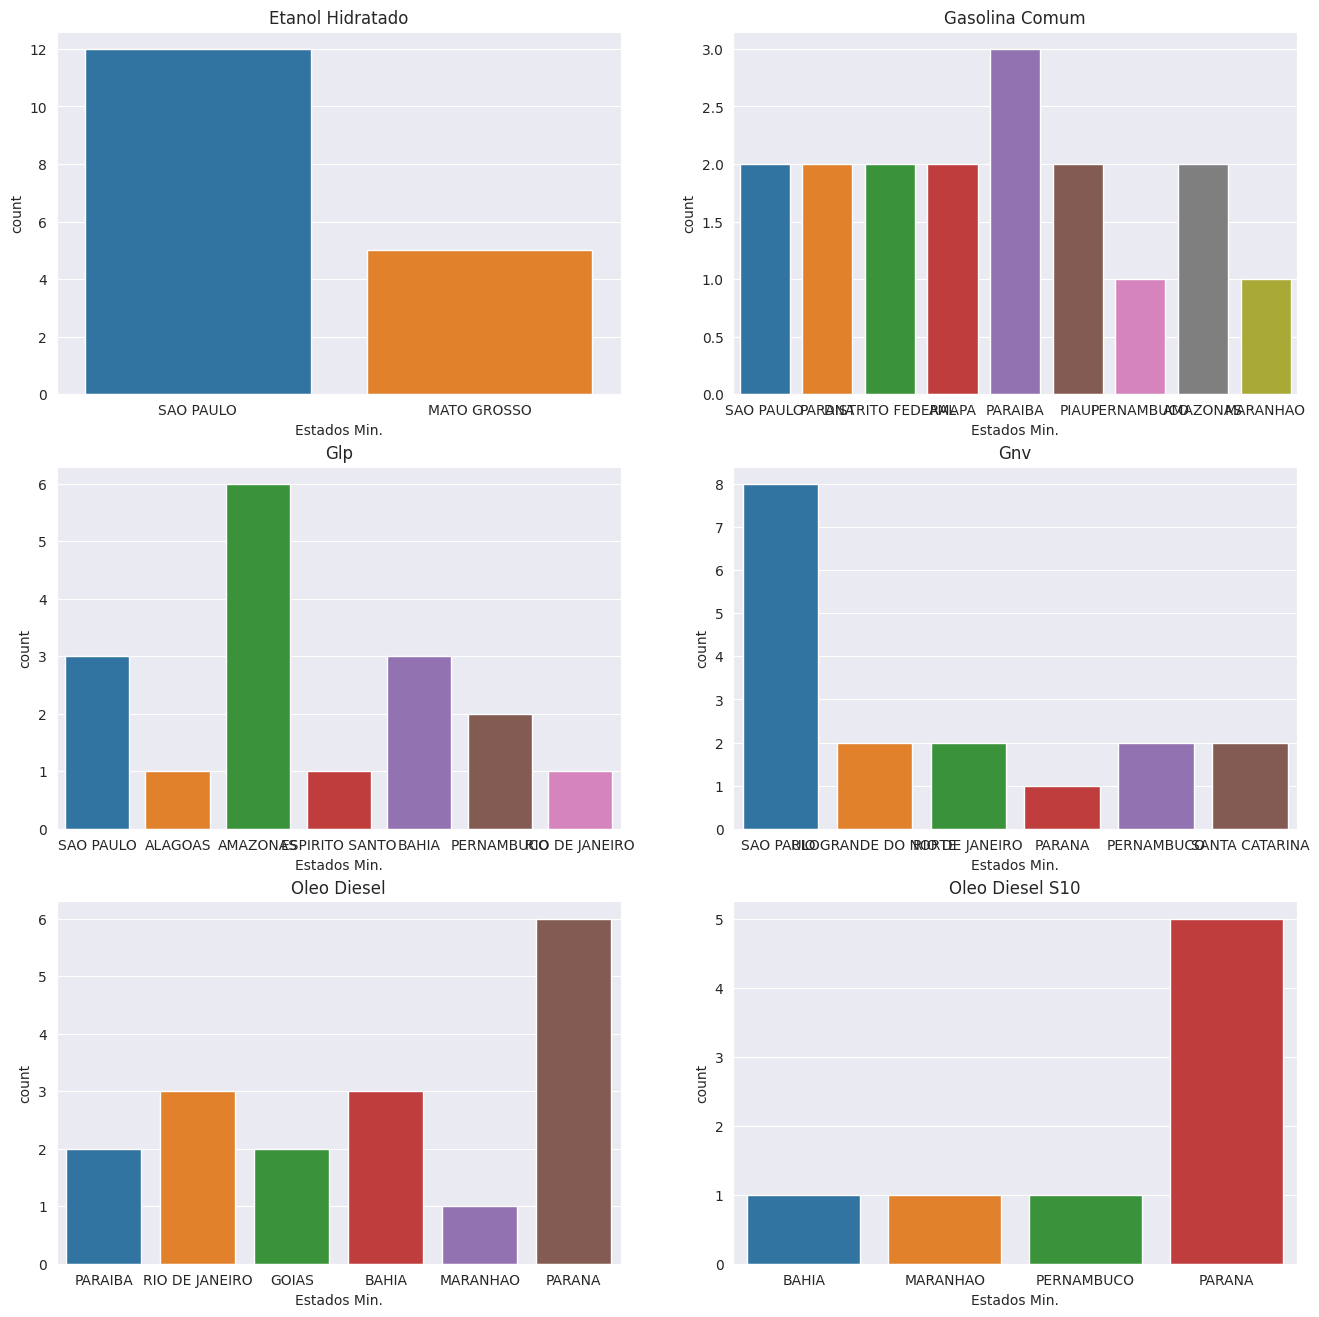

In [31]:
mykeys = [*df_result.keys()]
fig, ax = plt.subplots(3,2,figsize=(16,16))
    
for i, key in enumerate(df_result):

    row = i // 2
    col = i % 2
    
    sns.set_style('darkgrid')
    sns.countplot(
        x='estado_min',
        data=df_result[key],
        ax=ax[row,col]
    )
    
    product = inflection.titleize(mykeys[i].replace('diff_',''))

    ax[row,col].set_title(product)
#     ax[row,col].set_xticklabels(ax[row,col].get_xticklabels(), rotation=20)
    ax[row,col].set_xlabel('Estados Min.');

## 4.6 Como diferentes regiões do Brasil viram seus preços de gás mudarem?

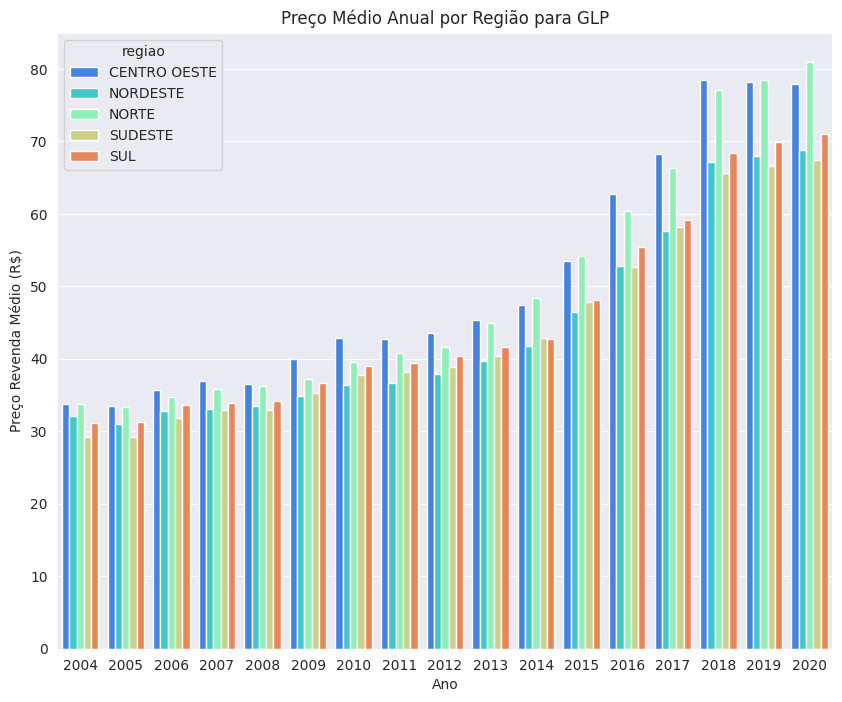

In [32]:
df_hip6 = (
    df4
    .loc[lambda x: x['produto'] == 'GLP']
    .groupby(['regiao', 'ano'])['preco_medio_revenda']
    .mean()
    .reset_index()
)

fig, ax = plt.subplots(figsize=(10,8))
    
sns.set_style('darkgrid')
sns.barplot(
    x='ano', 
    y='preco_medio_revenda', 
    data=df_hip6,
    hue='regiao',
    palette='rainbow',
    ax=ax
)

ax.set_title('Preço Médio Anual por Região para GLP')
ax.set_ylabel('Preço Revenda Médio (R$)')
ax.set_xlabel('Ano');